# Curve Fitting - Method of least squares

In [143]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#x_data = np.array([10, 12, 13, 16, 17, 20, 25])
#y_data = np.array([19, 22, 24, 27, 29, 33, 37])

x_data = np.array([15, 20, 25, 30, 35, 40])
y_data = np.array([12, 14, 18, 25, 31, 44])


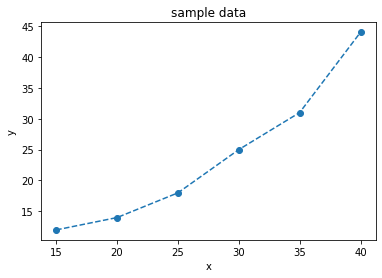

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title="sample data", xlabel="x", ylabel="y")
ax.plot(x_data, y_data, 'o--')

## Adddding correction to x data to simplify the calculation

In [5]:
x_mean = x_data.mean()
corr_factor = 0#round(x_mean)
x_corr = x_data - corr_factor

In [6]:
xy = []
x_sq = []
for i, x in enumerate(x_corr):
    x_sq.append(x**2)
    xy.append(x * y_data[i])

xy = np.array(xy)
x_sq = np.array(x_sq)

x_sum = x_corr.sum()
y_sum = y_data.sum()
xy_sum = xy.sum()
x_sq_sum = x_sq.sum()
n = len(x_data)

In [7]:
print ("{:<8} |  {:<8} | {:<8} | {:<8}".format('x','y','xy', 's_sq', 'x'))
print()
for i, x in enumerate(x_corr):
    print ("{:<8} |  {:<8} | {:<8} | {:<8}".format(x, y_data[i], xy[i], x_sq[i]))

print("-------------------------------------")
print ("{:<8} |  {:<8} | {:<8} | {:<8}".format(x_sum, y_sum, xy_sum, x_sq_sum))    

x        |  y        | xy       | s_sq    

15       |  12       | 180      | 225     
20       |  14       | 280      | 400     
25       |  18       | 450      | 625     
30       |  25       | 750      | 900     
35       |  31       | 1085     | 1225    
40       |  44       | 1760     | 1600    
-------------------------------------
165      |  144      | 4505     | 4975    


## Calculating the parameters for the straignt line using the formulas:-
### Σy = a.n + bΣx 
### $Σxy = a.Σx + bΣx^2$

In [8]:
eq1 = np.array([y_sum, n, x_sum])  
eq2 = np.array([xy_sum, x_sum, x_sq_sum])

factor = x_sum/n
eq3 = eq1 * factor
eq4 = eq3 - eq2

b = eq4[0]/eq4[2]
a = (eq1[0] - b * eq1[2])/n
print("a = {}, b = {}".format(a, b))

a = -10.257142857142858, b = 1.2457142857142858


## Predicting the y values using the best fit line

In [9]:
y_pred = []
for i, x in enumerate(x_corr):
    y = a + b*(x+corr_factor)
    y_pred.append(y)
print(y_pred)

[8.428571428571429, 14.657142857142857, 20.885714285714286, 27.114285714285714, 33.34285714285714, 39.57142857142857]


## Plotting the predicted and original data

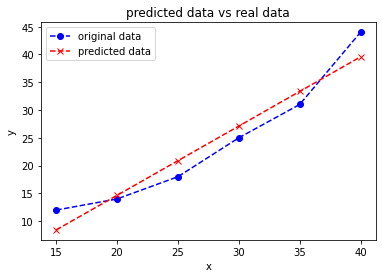

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title="predicted data vs real data", xlabel="x", ylabel="y")

ax.plot(x_data, y_data, 'o--', color = "blue", label="original data")
ax.plot(x_data, y_pred, 'x--', color = "red", label="predicted data")
ax.legend(loc='upper left')

In [11]:
print ("{:<5} |  {:<5} | {:<4} | {:<8}  | {:<4}".format('x','y','y_pred', 'diff', 'diff_sq'))
print("---------------------------------------------")
for i, x in enumerate(x_corr):
    diff = y_data[i] - y_pred[i]
    print ("{:<5} |  {:<5} | {:0.3f} | {:<8}  | {:<0.2f}".format(x, y_data[i], y_pred[i], str(round(diff, 3)) , diff**2))

x     |  y     | y_pred | diff      | diff_sq
---------------------------------------------
15    |  12    | 8.429 | 3.571     | 12.76
20    |  14    | 14.657 | -0.657    | 0.43
25    |  18    | 20.886 | -2.886    | 8.33
30    |  25    | 27.114 | -2.114    | 4.47
35    |  31    | 33.343 | -2.343    | 5.49
40    |  44    | 39.571 | 4.429     | 19.61
